In [177]:
# Import Libraries
import pandas as pd
import numpy as np
from numpy import array
from numpy import hstack
import matplotlib.pyplot as plt

import datetime as dt
import yfinance as yf
import pandas_datareader as pdr

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

In [178]:
# Get Training Data
start = dt.datetime(2015,1,1)
end = dt.datetime(2020,6,30)
gbp_train = pdr.DataReader('fxb', 'yahoo', start, end)['Adj Close'].dropna()
eur_train = pdr.DataReader('fxe', 'yahoo', start, end)['Adj Close'].dropna()
ief_train = pdr.DataReader('ief', 'yahoo', start, end)['Adj Close'].dropna()
gld_train = pdr.DataReader('gld', 'yahoo', start, end)['Adj Close'].dropna()
spy_train = pdr.DataReader('spy', 'yahoo', start, end)['Adj Close'].dropna()

In [179]:
# Get Test Data
start = dt.datetime(2020,7,1)
end = dt.datetime(2020,12,31)
gbp_test = pdr.DataReader('fxb', 'yahoo', start, end)['Adj Close'].dropna()
eur_test = pdr.DataReader('fxe', 'yahoo', start, end)['Adj Close'].dropna()
ief_test = pdr.DataReader('ief', 'yahoo', start, end)['Adj Close'].dropna()
gld_test = pdr.DataReader('gld', 'yahoo', start, end)['Adj Close'].dropna()
spy_test = pdr.DataReader('spy', 'yahoo', start, end)['Adj Close'].dropna()

In [180]:
# Put data into Numpy format
scaler = MinMaxScaler()
gbp_train = np.array(gbp_train).reshape(-1,1)
eur_train = np.array(eur_train).reshape(-1,1)
ief_train = np.array(ief_train).reshape(-1,1)
gld_train = np.array(gld_train).reshape(-1,1)
spy_train = np.array(spy_train).reshape(-1,1)
gbp_test = np.array(gbp_test).reshape(-1,1)
eur_test = np.array(eur_test).reshape(-1,1)
ief_test = np.array(ief_test).reshape(-1,1)
gld_test = np.array(gld_test).reshape(-1,1)
spy_test = np.array(spy_test).reshape(-1,1)

In [181]:
# Fit Transform into unit interval
gbp_train = scaler.fit_transform(gbp_train)
eur_train = scaler.fit_transform(eur_train)
ief_train = scaler.fit_transform(ief_train)
gld_train = scaler.fit_transform(gld_train)
spy_train = scaler.fit_transform(spy_train)
gbp_test = scaler.fit_transform(gbp_test)
eur_test = scaler.fit_transform(eur_test)
ief_test = scaler.fit_transform(ief_test)
gld_test = scaler.fit_transform(gld_test)
spy_test = scaler.fit_transform(spy_test)

In [182]:
# Convert time series arrays to rows/colums
eur_train = eur_train.reshape((len(eur_train), 1))
gld_train = gld_train.reshape((len(gld_train), 1))
ief_train = ief_train.reshape((len(ief_train), 1))
spy_train = spy_train.reshape((len(spy_train), 1))
gbp_train = gbp_train.reshape((len(gbp_train), 1))
eur_test = eur_test.reshape((len(eur_test), 1))
gld_test = gld_test.reshape((len(gld_test), 1))
ief_test = ief_test.reshape((len(ief_test), 1))
spy_test = spy_test.reshape((len(spy_test), 1))
gbp_test = gbp_test.reshape((len(gbp_test), 1))

In [183]:
# Merge the data into one array
train_dataset = hstack((eur_train, gld_train, ief_train, spy_train, gbp_train))
test_dataset = hstack((eur_test, gld_test, ief_test, spy_test, gbp_test))

In [184]:
# Function to turn multivariate series into sequence
def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out-1
        # check if we are beyond the dataset
        if out_end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix, -1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [185]:
# Choose number of time steps
n_steps_in, n_steps_out = 5, 1

In [186]:
# Convert into input/output with above function
X, y = split_sequences(train_dataset, n_steps_in, n_steps_out)

In [187]:
# Check shape of newly structured data
print(X.shape, y.shape)

(1379, 5, 4) (1379, 1)


In [188]:
# Define number of features for LSTM entry
n_features = X.shape[2]

In [189]:
# Set up the LSTM
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(100, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')

In [190]:
# Fit the model with the training data set
model.fit(X, y, epochs=40, verbose=1)

Epoch 1/40
44/44 [==============================] - 0s 7ms/step - loss: 0.1041
Epoch 2/40
44/44 [==============================] - 0s 6ms/step - loss: 0.0219
Epoch 3/40
44/44 [==============================] - 0s 6ms/step - loss: 0.0088
Epoch 4/40
44/44 [==============================] - 0s 6ms/step - loss: 0.0071
Epoch 5/40
44/44 [==============================] - 0s 6ms/step - loss: 0.0064
Epoch 6/40
44/44 [==============================] - 0s 6ms/step - loss: 0.0053
Epoch 7/40
44/44 [==============================] - 0s 6ms/step - loss: 0.0046
Epoch 8/40
44/44 [==============================] - 0s 6ms/step - loss: 0.0044
Epoch 9/40
44/44 [==============================] - 0s 6ms/step - loss: 0.0036
Epoch 10/40
44/44 [==============================] - 0s 6ms/step - loss: 0.0033
Epoch 11/40
44/44 [==============================] - 0s 6ms/step - loss: 0.0033
Epoch 12/40
44/44 [==============================] - 0s 6ms/step - loss: 0.0031
Epoch 13/40
44/44 [==============================

In [191]:
# Obtain X variables and y variable from test dataset
X_test, y_test = split_sequences(test_dataset, n_steps_in, n_steps_out)

In [192]:
print(X_test.shape)

(124, 5, 4)


In [193]:
y_pred = model.predict(X_test, verbose=1)

4/4 [==============================] - 0s 2ms/step


In [194]:
y_test = np.array(gbp_test).reshape(-1,1)
y_test = scaler.inverse_transform(gbp_test)
y_pred = np.array(y_pred).reshape(-1,1)
y_pred = scaler.inverse_transform(y_pred)

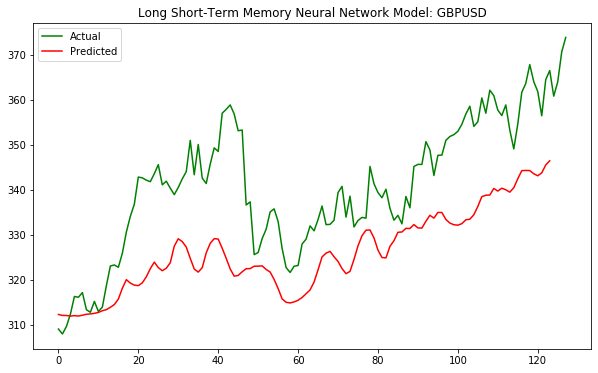

In [195]:
# Visualizing the results
plt.figure(figsize=(10,6))
plt.title('Long Short-Term Memory Neural Network Model: GBPUSD')
plt.plot(y_test, label = 'Actual', color = 'g')
plt.plot(y_pred , label = 'Predicted', color = 'r')
plt.legend()

In [218]:
index = [0, 1, 2, 3]

In [219]:
y_test = np.delete(y_test, index)

In [220]:
print(y_pred.shape)

(124, 1)


In [221]:
print(y_test.shape)

(124,)


In [223]:
print(mean_absolute_error(y_test, y_pred))

15.756046357168067
